In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal

from sklearn.preprocessing import StandardScaler


%config Completer.use_jedi = False
%matplotlib inline

In [2]:
df = pd.read_csv('Ready_for_pca.csv', index_col=[0])

In [3]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,9990,9991,9992,9993,9994,9995,9996,9998,9999,10000
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311,68a861fd-0d20-4e51-a587-8a90407ee574,2b451d12-6c2b-4cea-a295-ba1d6bced078,6630d501-838c-4be4-a59c-6f58c814ed6a,70ddaa89-b726-49dc-9022-2d655e4c7936,05a49ee3-8fd5-453a-a5f3-82b6cd986856,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,...,e8f40610-af75-4bfd-baf8-0b15918b04ed,89d0d064-307e-4f21-a5b4-6ec1137c8bfc,24f1d865-3d58-495f-9dc9-b5927a1fd40a,ce7abedd-6437-4609-9123-8a4a8234381e,3f3c716b-fd57-40f2-8a58-d944efcf1fd5,c60df12b-a50b-4397-ae57-98381a0d3960,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,e8307ddf-9a01-4fff-bc59-4742e03fd24f,3775ccfc-0052-4107-81ae-9657f81ecdf3,9de5fb6e-bd33-4995-aec8-f01d0172a499
City,Point Baker,West Branch,Yamhill,Del Mar,Needville,Fort Valley,Pioneer,Oklahoma City,Saint Cloud,Cincinnati,...,Little Eagle,Gilmore City,Smyrna,Haubstadt,Machias,West Kill,Mount Holly,Mobeetie,Carrollton,Clarkesville
State,AK,MI,OR,CA,TX,GA,TN,OK,FL,OH,...,SD,IA,NY,IN,ME,NY,VT,TX,GA,GA
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego,Fort Bend,Peach,Scott,Oklahoma,Osceola,Hamilton,...,Corson,Humboldt,Chenango,Gibson,Washington,Greene,Rutland,Wheeler,Carroll,Habersham
Zip,99927,48661,97148,92014,77461,31030,37847,73109,34771,45237,...,57639,50541,13464,47639,4654,12492,5758,79061,30117,30523
Lat,56.251,44.32893,45.35589,32.96687,29.38012,32.57032,36.4342,35.43313,28.27646,39.19296,...,45.7036,42.71548,42.68582,38.17985,44.77104,42.18491,43.43391,35.52039,33.58016,34.70783
Lng,-133.37571,-84.2408,-123.24657,-117.24798,-95.80673,-83.8904,-84.27892,-97.52463,-81.16273,-84.4523,...,-100.7717,-94.44913,-75.61754,-87.57497,-67.55341,-74.33574,-72.78734,-100.4418,-85.13241,-83.53648
Population,38,10446,3735,13863,11352,17701,2535,23144,17351,20193,...,338,836,1378,4261,3209,210,640,406,35575,12230
Area,Urban,Urban,Urban,Suburban,Suburban,Urban,Suburban,Suburban,Suburban,Rural,...,Rural,Rural,Rural,Suburban,Rural,Urban,Rural,Rural,Urban,Urban
Timezone,America/Sitka,America/Detroit,America/Los_Angeles,America/Los_Angeles,America/Chicago,America/New_York,America/New_York,America/Chicago,America/New_York,America/New_York,...,America/Denver,America/Chicago,America/New_York,America/Chicago,America/New_York,America/New_York,America/New_York,America/Chicago,America/New_York,America/New_York


In [4]:
df['Churn'].replace({
    'No': 0,
    'Yes': 1
}, inplace=True)

In [5]:
# grabbing the numeric values 
pca_df = df.loc[:,['Age', 'Income', 'Outage_sec_perweek', 'Tenure',
          'MonthlyCharge', 'Bandwidth_GB_Year']]

In [6]:
df_standard = StandardScaler().fit_transform(pca_df)

In [7]:
df_standard

array([[ 0.82364381, -0.41661389, -0.96141438, -1.09566271, -0.06032433,
        -1.20122096],
       [-1.45734354, -0.74776818,  0.41451893, -1.31935559,  1.58776043,
        -1.25119787],
       [-0.17776527, -0.05602088, -0.06821322, -0.74027316, -0.33714857,
        -0.64612559],
       ...,
       [-0.01086376, -0.05602088, -1.54401126,  0.13349416, -0.13475186,
         0.36959586],
       [-0.78973748, -0.99102814,  0.43141634,  1.45512645,  1.81090468,
         1.48403815],
       [-1.4017097 , -0.05602088,  0.58568428,  1.14789204,  1.02124303,
         1.18921963]])

In [8]:
df_standard.mean(), df_standard.std()

(-2.7187555433417355e-17, 1.0)

In [9]:
feat_cols = ['feature'+str(i) for i in range(df_standard.shape[1])]
normalised_df = pd.DataFrame(df_standard,columns=feat_cols)


In [10]:
normalised_df

,feature0,feature1,feature2,feature3,feature4,feature5
0,0.823644,-0.416614,-0.961414,-1.095663,-0.060324,-1.201221
1,-1.457344,-0.747768,0.414519,-1.319356,1.587760,-1.251198
2,-0.177765,-0.056021,-0.068213,-0.740273,-0.337149,-0.646126
3,-0.289033,-0.882000,1.285507,-0.687390,-1.240526,-0.593099
4,1.658151,0.139342,-0.418966,-1.298954,-0.537210,-1.506740
...,...,...,...,...,...,...
9556,-0.400301,0.927006,-0.923728,-0.245355,-0.700255,0.749152
9557,-0.010864,0.895103,-0.335712,1.340144,-0.328196,1.504692
9558,-0.010864,-0.056021,-1.544011,0.133494,-0.134752,0.369596
9559,-0.789737,-0.991028,0.431416,1.455126,1.810905,1.484038


In [11]:
pcs = PCA()
pcs.fit(normalised_df)

loadings = pd.DataFrame(pcs.components_, columns=pca_df.columns)

In [12]:
loadings

,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.007860,-0.001307,0.019197,0.705303,0.044823,0.707182
1,-0.043443,-0.103884,0.700801,-0.060045,0.701837,-0.004297
2,-0.796420,0.583372,0.128385,-0.015921,-0.092441,0.010479
3,0.584060,0.803207,0.050707,0.007982,0.105043,-0.008019
4,-0.147761,0.061173,-0.699592,-0.037998,0.695287,0.011290
5,0.028394,0.000163,-0.005100,-0.705110,-0.049124,0.706806


In [13]:
def abline(slope, intercept, ax):
    """
    Calculates coordinates of a line basd on slope and intercepts
    """
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

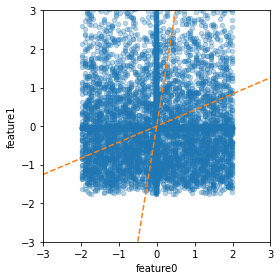

In [14]:
ax = normalised_df.plot.scatter(x='feature0', y='feature1', alpha=0.3,
                          figsize = (4,4))

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

ax.plot(*abline(loadings.loc[0, 'Age'] / loadings.loc[0, 'Income'],
               0, ax),
       ls = '--', c = 'C1')

ax.plot(*abline(loadings.loc[1, 'Age'] / loadings.loc[1, 'Income'],
               0, ax),
       ls = '--', c = 'C1')

plt.tight_layout()
plt.show()

###  interpreting principal componets 

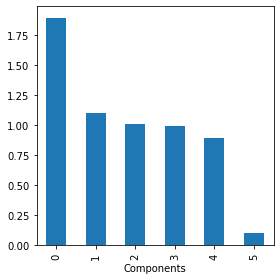

In [15]:
sp_pca = PCA()
sp_pca.fit(normalised_df)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4,4))
ax.set_xlabel('Components')

plt.tight_layout()
plt.show()

In [16]:
data_pca = PCA(n_components=3)
data_pca_trans = data_pca.fit_transform(normalised_df)

In [17]:
data_pca_df = pd.DataFrame(data=data_pca_trans,
                          columns= ['PCA1', 'PCA2', 'PCA3'])
data_pca_df

,PCA1,PCA2,PCA3
0,-1.649345,-0.637649,-1.012006
1,-1.723813,1.630433,0.638769
2,-0.993996,-0.223659,0.136319
3,-0.931749,0.178242,0.000101
4,-2.027033,-0.672685,-1.238534
...,...,...,...
9556,0.309552,-1.206211,0.817493
9557,1.987059,-0.645056,0.512500
9558,0.320004,-1.179930,-0.208052
9559,2.172745,1.616807,-0.068805


In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
print('explained variation per principal components: {}'.format(data_pca.explained_variance_ratio_))

explained variation per principal components: [0.31554748 0.18355186 0.1677996 ]


# PCA1 holds 32% of the information while PCA2 holds 18 percent of the information

In [20]:
# finaldf = pd.concat([principal_df, df[['Churn']]], join='outer', axis=1)

In [21]:
finaldf= pd.concat([data_pca_df, df[['Churn']]], join='outer', axis=1)

In [22]:
finaldf

,PCA1,PCA2,PCA3,Churn
0,-1.649345,-0.637649,-1.012006,0
1,-1.723813,1.630433,0.638769,1
2,-0.993996,-0.223659,0.136319,0
3,-0.931749,0.178242,0.000101,0
4,-2.027033,-0.672685,-1.238534,1
...,...,...,...,...
9556,0.309552,-1.206211,0.817493,0
9557,1.987059,-0.645056,0.512500,0
9558,0.320004,-1.179930,-0.208052,0
9559,2.172745,1.616807,-0.068805,0


In [23]:
finaldf

,PCA1,PCA2,PCA3,Churn
0,-1.649345,-0.637649,-1.012006,0
1,-1.723813,1.630433,0.638769,1
2,-0.993996,-0.223659,0.136319,0
3,-0.931749,0.178242,0.000101,0
4,-2.027033,-0.672685,-1.238534,1
...,...,...,...,...
9556,0.309552,-1.206211,0.817493,0
9557,1.987059,-0.645056,0.512500,0
9558,0.320004,-1.179930,-0.208052,0
9559,2.172745,1.616807,-0.068805,0


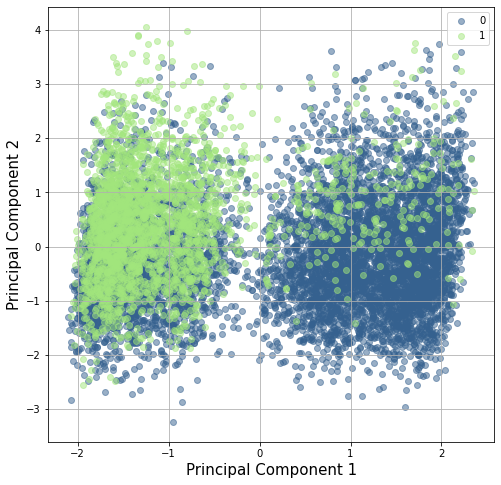

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = [0, 1]
colors = ["#35618f", "#a2e67c"]
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Churn'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'PCA1'],
               finaldf.loc[indicesToKeep, 'PCA2'],
#                finaldf.loc[indicesToKeep, 'PCA3'], 
               c = color, alpha=0.5)
ax.legend(targets)
ax.grid()

In [25]:
df.Churn.value_counts()

0    7031
1    2530
Name: Churn, dtype: int64

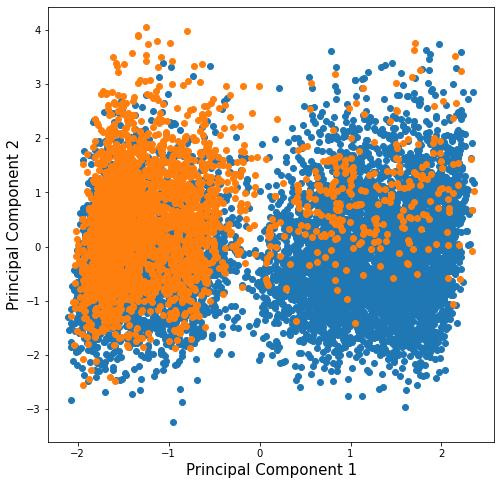

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = finaldf['Churn'] == target
    plt.scatter(finaldf.loc[indicesToKeep, 'PCA1'],
                finaldf.loc[indicesToKeep, 'PCA2'],
#                 finaldf.loc[indicesToKeep, 'PCA3'],
)
    

In [27]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :],
                      columns=normalised_df.columns)

In [28]:
loadings.drop('feature6', axis=1, inplace=True)

KeyError: "['feature6'] not found in axis"

In [ ]:
loadings

In [ ]:
pca_df

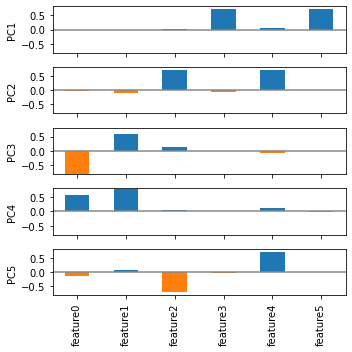

In [29]:

maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
finaldf

In [ ]:
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection='3d')

targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Churn'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'PCA1'],
                 finaldf.loc[indicesToKeep, 'PCA2'],
               c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
fig = plt.figure(figsize= (12,8))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(finaldf.loc[indicesToKeep, 'PCA1'],
                    finaldf.loc[indicesToKeep, 'PCA2'],
                    finaldf.loc[indicesToKeep, 'PCA3'],
                    alpha=0.6)

ax.set_zlabel('third')

In [ ]:
from yellowbrick.features import PCA

In [ ]:
vis_3 = PCA(scale=True, projection=3,
           random_state=2020,
           colors=['red', 'blue'])

vis_3.fit_transform(finaldf, finaldf.Churn)
